## Problem Statement

The dataset consists of 10,000 reviews which are classified into 'Label 1' and 'Label 2'. The attached file has two columns 'Text' and 'Label'.

1) Perform Text Pre-processing steps to clean reviews

2) Derive features from text data 

3) Build different Machine Learning Models for text classification and compare the results

#### Importing the required libraries

In [1]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset

In [2]:
corpus = pd.read_csv("corpus.csv",delimiter="\t",encoding='utf-8')

#### Check the number of rows and columns

In [3]:
corpus.shape

(10000, 1)

In [4]:
pd.set_option('display.max_colwidth', 800)

#### Display top rows

In [5]:
corpus.head()

,"text,label"
0,"Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate video game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^,__label__2"
1,"The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.,__label__2"
2,"Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of ""Prisoners of Fate"" (which means all the more if you've played the game) and the hope in ""A Distant Promise"" and ""Girl who Stole the Star"" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like ""Chrono Cross ~ Time's Scar~"", ""Time of the Dreamwatch"", and ""Chronomantique"" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer's work (I haven't heard the Xenogears soundtrack, so I can't say for sure), and even if you've never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.,__label__2"
3,"Excellent Soundtrack: I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and peaceful.On disk one. my favorites are Scars Of Time, Between Life and Death, Forest Of Illusion, Fortress of Ancient Dragons, Lost Fragment, and Drowned Valley.Disk Two: The Draggons, Galdorb - Home, Chronomantique, Prisoners of Fate, Gale, and my girlfriend likes ZelbessDisk Three: The best of the three. Garden Of God, Chronopolis, Fates, Jellyfish sea, Burning Orphange, Dragon's Prayer, Tower Of Stars, Dragon God, and Radical Dreamers - Unstealable Jewel.Overall, this is a excellent soundtrack and should be brought by those that like video game music.Xander Cross,__label__2"
4,"Remember, Pull Your Jaw Off The Floor After Hearing it: If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that good! The greatest songs are without a doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, and the Sea and Radical Dreamers: Unstolen Jewel. (Translation varies) This music is perfect if you ask me, the best it can be. Yasunori Mitsuda just poured his heart on and wrote it down on paper.,__label__2"


#### Searching and grouping to split the data using regular expression

In [6]:
corpus['label']=[re.search(r"label__\d", text).group() for text in corpus['text,label']]
corpus['label'][2]

'label__2'

#### Splitting the label and text columns

In [7]:
corpus['text']=[re.split(r"__label__\d", text)[0] for text in corpus['text,label']]

In [8]:
corpus.drop(columns =["text,label"], inplace = True) 

In [9]:
corpus

,label,text
0,label__2,"Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate video game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^,"
1,label__2,"The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.,"
2,label__2,"Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of ""Prisoners of Fate"" (which means all the more if you've played the game) and the hope in ""A Distant Promise"" and ""Girl who Stole the Star"" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like ""Chrono Cross ~ Time's Scar~"", ""Time of the Dreamwatch"", and ""Chronomantique"" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer's work (I haven't heard the Xenogears soundtrack, so I can't say for sure), and even if you've never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.,"
3,label__2,"Excellent Soundtrack: I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and peaceful.On disk one. my favorites are Scars Of Time, Between Life and Death, Forest Of Illusion, Fortress of Ancient Dragons, Lost Fragment, and Drowned Valley.Disk Two: The Draggons, Galdorb - Home, Chronomantique, Prisoners of Fate, Gale, and my girlfriend likes ZelbessDisk Three: The best of the three. Garden Of God, Chronopolis, Fates, Jellyfish sea, Burning Orphange, Dragon's Prayer, Tower Of Stars, Dragon God, and Radical Dreamers - Unstealable Jewel.Overall, this is a excellent soundtrack and should be brought by those that like video game music.Xander Cross,"
4,label__2,"Remember, Pull Your Jaw Off The Floor After Hearing it: If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that good! The greatest songs are without a doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, and the Sea and Radical Dreamers: Unstolen Jewel. (Translation varies) This music is perfect if you ask me, the best it can be. Yasunori Mitsuda just poured his heart on and wrote it down on paper.,"
...,...,...
9995,label__2,"A revelation of life in small town America in early 1900s: Though a scholarly biography, the book reveals much more about life in a small mid-west America town at the turn of the century than many other biographies or novels. Well worth reading for an insight into ""news"" that didn't make most newspapers but which was true in revealing life, the book is nicely crafted and the author writes with a knowing touch.One would wish for more intimate details of the subject's life, but he was a private man, kept no diary, and did not tell his innermost thoughts to his family. The book, however, succeeds, because it reveals the town, Lamar, MO (which happened to be President Truman's birthplace, and where Wyatt Earp had been Marshall and where the Earp kinfolk lived on) and some of the foibles a..."
9996,label__2,"Great biography of a very interesting journalist: This biography of Arthur Aull, a small-town journalist at the turn of the twentieth cen

#### Displaying the top rows after the split

In [10]:
corpus.head(10)

,label,text
0,label__2,"Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate video game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^,"
1,label__2,"The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.,"
2,label__2,"Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of ""Prisoners of Fate"" (which means all the more if you've played the game) and the hope in ""A Distant Promise"" and ""Girl who Stole the Star"" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like ""Chrono Cross ~ Time's Scar~"", ""Time of the Dreamwatch"", and ""Chronomantique"" (indefinably remeniscent of Chrono Trigger) are all absolutely superb as well.This soundtrack is amazing music, probably the best of this composer's work (I haven't heard the Xenogears soundtrack, so I can't say for sure), and even if you've never played the game, it would be worth twice the price to buy it.I wish I could give it 6 stars.,"
3,label__2,"Excellent Soundtrack: I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and peaceful.On disk one. my favorites are Scars Of Time, Between Life and Death, Forest Of Illusion, Fortress of Ancient Dragons, Lost Fragment, and Drowned Valley.Disk Two: The Draggons, Galdorb - Home, Chronomantique, Prisoners of Fate, Gale, and my girlfriend likes ZelbessDisk Three: The best of the three. Garden Of God, Chronopolis, Fates, Jellyfish sea, Burning Orphange, Dragon's Prayer, Tower Of Stars, Dragon God, and Radical Dreamers - Unstealable Jewel.Overall, this is a excellent soundtrack and should be brought by those that like video game music.Xander Cross,"
4,label__2,"Remember, Pull Your Jaw Off The Floor After Hearing it: If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that good! The greatest songs are without a doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, and the Sea and Radical Dreamers: Unstolen Jewel. (Translation varies) This music is perfect if you ask me, the best it can be. Yasunori Mitsuda just poured his heart on and wrote it down on paper.,"
5,label__2,"an absolute masterpiece: I am quite sure any of you actually taking the time to read this have played the game at least once, and heard at least a few of the tracks here. And whether you were aware of it or not, Mitsuda's music contributed greatly to the mood of every single minute of the whole game.Composed of 3 CDs and quite a few songs (I haven't an exact count), all of which are heart-rendering and impressively remarkable, this soundtrack is one I assure you you will not forget. It has everything for every listener -- from fast-paced and energetic (Dancing the Tokage or Termina Home), to slower and more haunting (Dragon God), to purely beautifully composed (Time's Scar), to even some fantastic vocals (Radical Dreamers).This is one of the best videogame soundtracks out there, and s..."
6,label__1,"Buyer beware: This is a self-published book, and if you want to know why--read a few paragraphs! Those 5 star reviews must have been written by Ms. Haddon's 

#### Check the counts in label 1 & 2

In [11]:
corpus['label'].value_counts()

label__1    5097
label__2    4903
Name: label, dtype: int64

#### Check the distribution of the two classes

In [12]:
corpus['label'].value_counts(normalize=True)*100

label__1    50.97
label__2    49.03
Name: label, dtype: float64

#### Check for null values

In [13]:
corpus.isnull().sum()

label    0
text     0
dtype: int64

#### Observation: There are no null values in the data set

In [14]:
type(corpus)

pandas.core.frame.DataFrame

In [15]:
corpus.dtypes

label    object
text     object
dtype: object

In [16]:
corpus['text'] = corpus['text'].astype(str)

In [17]:
corpus.dtypes

label    object
text     object
dtype: object

### Preprocessing

In [18]:
# Step - a : Remove blank rows if any
# Corpus['text'].dropna(inplace=True) 

# Step - b : Change all the text to lower case. This is required as python interprets 'data' and 'DATA' differently
corpus['text'] = [token.lower() for token in corpus['text']]

# Step - c : Tokenization : In this step, each entry in the corpus will be broken into set of words
corpus['text'] = [word_tokenize(token) for token in corpus['text']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmatization.

# WordNet is the lexical database i.e. dictionary for the English language, specifically designed for natural language processing.
# The WordNet is a part of Python's Natural Language Toolkit. It is a large word database of English Nouns, Adjectives, Adverbs and Verbs.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to 'Noun'

tag_map = defaultdict(lambda : wn.NOUN)

tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

# Initializing WordNetLemmatizer()
word_Lemmatized = WordNetLemmatizer()
    
for index, entry in enumerate(corpus['text']):
    
    # Declaring an Empty List to store the words that follow the rules for this step
    Final_words = []
       
    # pos_tag function below will provide the 'tag' i.e. if the word is Noun(N) or Verb(V) or something else.
    
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
            
    # The final processed set of words for each iteration will be stored in 'text_final'
    corpus.loc[index,'text_final'] = str(Final_words)
    

In [19]:
nltk.help.upenn_tagset("JJ$")
nltk.help.upenn_tagset("NN$")
nltk.help.upenn_tagset("RB")
nltk.help.upenn_tagset("VB")

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


#### Display top rows after preprocessing

In [20]:
corpus.head()

,label,text,text_final
0,label__2,"[stuning, even, for, the, non-gamer, :, this, sound, track, was, beautiful, !, it, paints, the, senery, in, your, mind, so, well, i, would, recomend, it, even, to, people, who, hate, video, game, music, !, i, have, played, the, game, chrono, cross, but, out, of, all, of, the, games, i, have, ever, played, it, has, the, best, music, !, it, backs, away, from, crude, keyboarding, and, takes, a, fresher, step, with, grate, guitars, and, soulful, orchestras, ., it, would, impress, anyone, who, cares, to, listen, !, ^_^, ,]","['stun', 'even', 'sound', 'track', 'beautiful', 'paint', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'video', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'game', 'ever', 'play', 'best', 'music', 'back', 'away', 'crude', 'keyboarding', 'take', 'fresh', 'step', 'grate', 'guitar', 'soulful', 'orchestra', 'would', 'impress', 'anyone', 'care', 'listen']"
1,label__2,"[the, best, soundtrack, ever, to, anything, ., :, i, 'm, reading, a, lot, of, reviews, saying, that, this, is, the, best, 'game, soundtrack, ', and, i, figured, that, i, 'd, write, a, review, to, disagree, a, bit, ., this, in, my, opinino, is, yasunori, mitsuda, 's, ultimate, masterpiece, ., the, music, is, timeless, and, i, 'm, been, listening, to, it, for, years, now, and, its, beauty, simply, refuses, to, fade.the, price, tag, on, this, is, pretty, staggering, i, must, say, ,, but, if, you, are, going, to, buy, any, cd, for, this, much, money, ,, this, is, the, only, one, ...]","['best', 'soundtrack', 'ever', 'anything', 'read', 'lot', 'review', 'say', 'best', 'soundtrack', 'figure', 'write', 'review', 'disagree', 'bit', 'opinino', 'yasunori', 'mitsuda', 'ultimate', 'masterpiece', 'music', 'timeless', 'listen', 'year', 'beauty', 'simply', 'refuse', 'price', 'tag', 'pretty', 'stagger', 'must', 'say', 'go', 'buy', 'cd', 'much', 'money', 'one', 'feel', 'would', 'worth', 'every']"
2,label__2,"[amazing, !, :, this, soundtrack, is, my, favorite, music, of, all, time, ,, hands, down, ., the, intense, sadness, of, ``, prisoners, of, fate, '', (, which, means, all, the, more, if, you, 've, played, the, game, ), and, the, hope, in, ``, a, distant, promise, '', and, ``, girl, who, stole, the, star, '', have, been, an, important, inspiration, to, me, personally, throughout, my, teen, years, ., the, higher, energy, tracks, like, ``, chrono, cross, ~, time, 's, scar~, '', ,, ``, time, of, the, dreamwatch, '', ,, and, ``, chronomantique, '', (, indefinably, remeniscent, of, chrono, trigger, ), ...]","['amaze', 'soundtrack', 'favorite', 'music', 'time', 'hand', 'intense', 'sadness', 'prisoner', 'fate', 'mean', 'play', 'game', 'hope', 'distant', 'promise', 'girl', 'steal', 'star', 'important', 'inspiration', 'personally', 'throughout', 'teen', 'year', 'high', 'energy', 'track', 'like', 'chrono', 'cross', 'time', 'time', 'dreamwatch', 'chronomantique', 'indefinably', 'remeniscent', 'chrono', 'trigger', 'absolutely', 'superb', 'soundtrack', 'amazing', 'music', 'probably', 'best', 'composer', 'work', 'hear', 'xenogears', 'soundtrack', 'ca', 'say', 'sure', 'even', 'never', 'play', 'game', 'would', 'worth', 'twice', 'price', 'buy', 'wish', 'could', 'give']"
3,label__2,"[excellent, soundtrack, :, i, truly, like, this, soundtrack, and, i, enjoy, video, game, music, ., i, have, played, this, game, and, most, of, the, music, on, here, i, enjoy, and, it, 's, truly, relaxing, and, peaceful.on, disk, one, ., my, favorites, are, scars, of, time, ,, between, life, and, death, ,, forest, of, illusion, ,, fortress, of, ancient, dragons, ,, lost, fragment, ,, and, drowned, valley.disk, two, :, the, draggons, ,, galdorb, -, home, ,, chronomantique, ,, prisoners, of, fate, ,, gale, ,, and, my, girlfriend, likes, zelbessdisk, three, :, the, best, of, the, three, ., garden, of, god, ,, ...]","['excellent', 'soundtrack', 'truly', 'like', 'soundtrack', 'enjoy', 'video', 'game', 'music', 'play', 'game', 'music', 'enjoy',

In [21]:
corpus.dtypes

label         object
text          object
text_final    object
dtype: object

#### Converting to the appropriate datatypes

In [22]:
corpus['label']=corpus['label'].astype("category")

In [23]:
corpus.dtypes

label         category
text            object
text_final      object
dtype: object

#### Performing train test split on the data

In [24]:
train_X, test_X, train_y, test_y = train_test_split(corpus['text_final'],corpus['label'],test_size=0.3,random_state=123)

### Calculation of TF-IDF 

#### Term Frequency: This summarizes how often a given word appears within a document

#### Inverse Document Frequency: This down scales words that appear a lot across documents

In [25]:
# Extending stop words list
stop_words = stopwords.words('english')
stop_words.extend(['aa','aah','fa','la','!'])

Tfidf_vect = TfidfVectorizer(stop_words=stop_words,max_df=0.8)
Tfidf_vect.fit(corpus['text_final'])
train_X_Tfidf = Tfidf_vect.transform(train_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)

In [26]:
print(train_X_Tfidf.shape)

(7000, 24438)


In [27]:
print(train_X_Tfidf[0])

  (0, 23713)	0.41239516205935073
  (0, 23066)	0.18917779435460197
  (0, 21491)	0.29638207409014095
  (0, 20059)	0.19787279004330352
  (0, 19669)	0.19486814641134143
  (0, 19205)	0.17404084006147086
  (0, 19099)	0.16806843626835258
  (0, 15087)	0.1612751896124468
  (0, 14447)	0.21295150406979932
  (0, 12307)	0.14669747852299314
  (0, 11432)	0.146806447402883
  (0, 10516)	0.14605122189619887
  (0, 9381)	0.0824529658456
  (0, 8711)	0.20619758102967536
  (0, 6921)	0.23810119091317825
  (0, 5250)	0.12565416121586073
  (0, 4670)	0.5595327139238399


In [28]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(7000,)
(3000,)
(7000,)
(3000,)


In [29]:
print(train_X[2:4])
print(train_y[2:4])
print("\n")
print(test_X[2:4])
print(test_y[2:4])

7925                                                                                                                                                                                                                                                                                                                                                                                                                         ['great', 'movie', 'great', 'movie', 'really', 'make', 'think', 'base', 'theory', 'every', 'second', 'every', 'day', 'determins', 'ultimate', 'fate', 'even', 'one', 'second', 'different', 'could', 'change', 'whole', 'life', 'twist', 'turn', 'movie', 'lola', 'race', 'protect', 'destiny', 'lover', 'run', 'lola', 'run']
309     ['novel', 'enjoyable', 'restaurant', 'antoine', 'ever', 'eat', 'wonderful', 'restaurant', 'antoine', 'french', 'quarter', 'new', 'orleans', 'many', 'theme', 'mardi', 'gras', 'private', 'room', 'definitely', 'enjoy', 'book', 'even', 'eat', 'antoine', 'intereste

In [30]:
train_X.head()

3144                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ['useless', 'sell', 'item', 'learn', 'open', 'corresponding', 'web', 'site', 'necessary', 'emarker', 'function', 'sony', 'terminate', 'corresponding', 'web', 'service', 'day', 'great', 'idea']
9939                                      ['veritable', 'masterpiece', 'neil', 'marshal', 'descent', 'great', 'outline', 'girlfriend', 'go', 'cave', 'find', 'alone', 'follow', 'fast', 'paced', 'adrenaline', 'fuel', 'thrill', 'ride', 'grab', 'throat', 'wo', 'let', 'man

#### Use ML algorithm to predict the outcome

#### Implementing Naive Bayes

In [31]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train = Naive.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test = Naive.predict(test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score on Train set -> ", accuracy_score(train_y, pred_train)*100)
print("Naive Bayes Accuracy Score on Validation set -> ", accuracy_score(test_y, pred_test)*100)

Naive Bayes Accuracy Score on Train set ->  92.35714285714286
Naive Bayes Accuracy Score on Validation set ->  81.53333333333333


In [32]:
from sklearn.metrics import classification_report

print("Classification Report on Train Data")
print(classification_report(train_y,pred_train,digits=2))
print("\n")

print("Classification Report on Test Data")
print(classification_report(test_y,pred_test,digits=2))

Classification Report on Train Data
              precision    recall  f1-score   support

    label__1       0.90      0.96      0.93      3571
    label__2       0.95      0.89      0.92      3429

    accuracy                           0.92      7000
   macro avg       0.93      0.92      0.92      7000
weighted avg       0.93      0.92      0.92      7000



Classification Report on Test Data
              precision    recall  f1-score   support

    label__1       0.79      0.87      0.83      1526
    label__2       0.85      0.76      0.80      1474

    accuracy                           0.82      3000
   macro avg       0.82      0.81      0.81      3000
weighted avg       0.82      0.82      0.81      3000



#### Implementing SVM

In [33]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel='linear')
SVM.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train1 = SVM.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = SVM.predict(test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score on Train set -> ", accuracy_score(train_y, pred_train1)*100)
print("SVM Accuracy Score on Validation set -> ",accuracy_score(test_y, pred_test1)*100)

SVM Accuracy Score on Train set ->  96.28571428571429
SVM Accuracy Score on Validation set ->  84.36666666666667


In [34]:
from sklearn.metrics import classification_report

print("Classification Report on Train Data")
print(classification_report(train_y,pred_train1,digits=2))
print("\n")

print("Classification Report on Test Data")
print(classification_report(test_y,pred_test1,digits=2))

Classification Report on Train Data
              precision    recall  f1-score   support

    label__1       0.97      0.96      0.96      3571
    label__2       0.96      0.97      0.96      3429

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000



Classification Report on Test Data
              precision    recall  f1-score   support

    label__1       0.85      0.84      0.85      1526
    label__2       0.84      0.84      0.84      1474

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



#### Implementing Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train2 = logreg.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test2 = logreg.predict(test_X_Tfidf)


In [36]:
from sklearn.metrics import classification_report

print("Classification Report on Train Data")
print(classification_report(train_y,pred_train2,digits=2))
print("\n")

print("Classification Report on Test Data")
print(classification_report(test_y,pred_test2,digits=2))

Classification Report on Train Data
              precision    recall  f1-score   support

    label__1       0.93      0.93      0.93      3571
    label__2       0.93      0.93      0.93      3429

    accuracy                           0.93      7000
   macro avg       0.93      0.93      0.93      7000
weighted avg       0.93      0.93      0.93      7000



Classification Report on Test Data
              precision    recall  f1-score   support

    label__1       0.85      0.85      0.85      1526
    label__2       0.85      0.85      0.85      1474

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



#### Implementing Decision Trees

In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier()

#dt_param_grid = {'classifier_criterion': ['entropy', 'gini'], 'classifier_max_depth': [6,8,10,12], "classifier_min_samples_split": [2, 10, 20],"classifier_min_samples_leaf": [1, 5, 10]}

#dt_grid = GridSearchCV(dt, param_grid=dt_param_grid, cv=5)

dt.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train3 = dt.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test3 = dt.predict(test_X_Tfidf)


In [42]:
from sklearn.metrics import classification_report

print("Classification Report on Train Data")
print(classification_report(train_y,pred_train3,digits=2))
print("\n")

print("Classification Report on Test Data")
print(classification_report(test_y,pred_test3,digits=2))

Classification Report on Train Data
              precision    recall  f1-score   support

    label__1       1.00      1.00      1.00      3571
    label__2       1.00      1.00      1.00      3429

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



Classification Report on Test Data
              precision    recall  f1-score   support

    label__1       0.73      0.72      0.72      1526
    label__2       0.71      0.73      0.72      1474

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

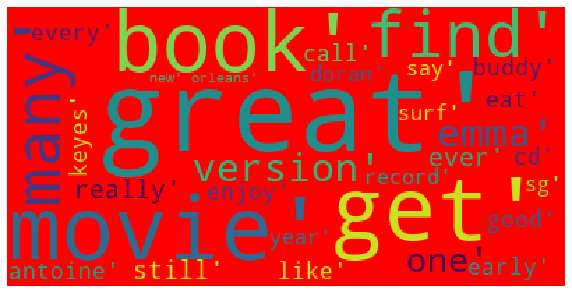

In [37]:
wordcloud = WordCloud(max_font_size=80,max_words=30, background_color="red").generate(str(train_X))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()